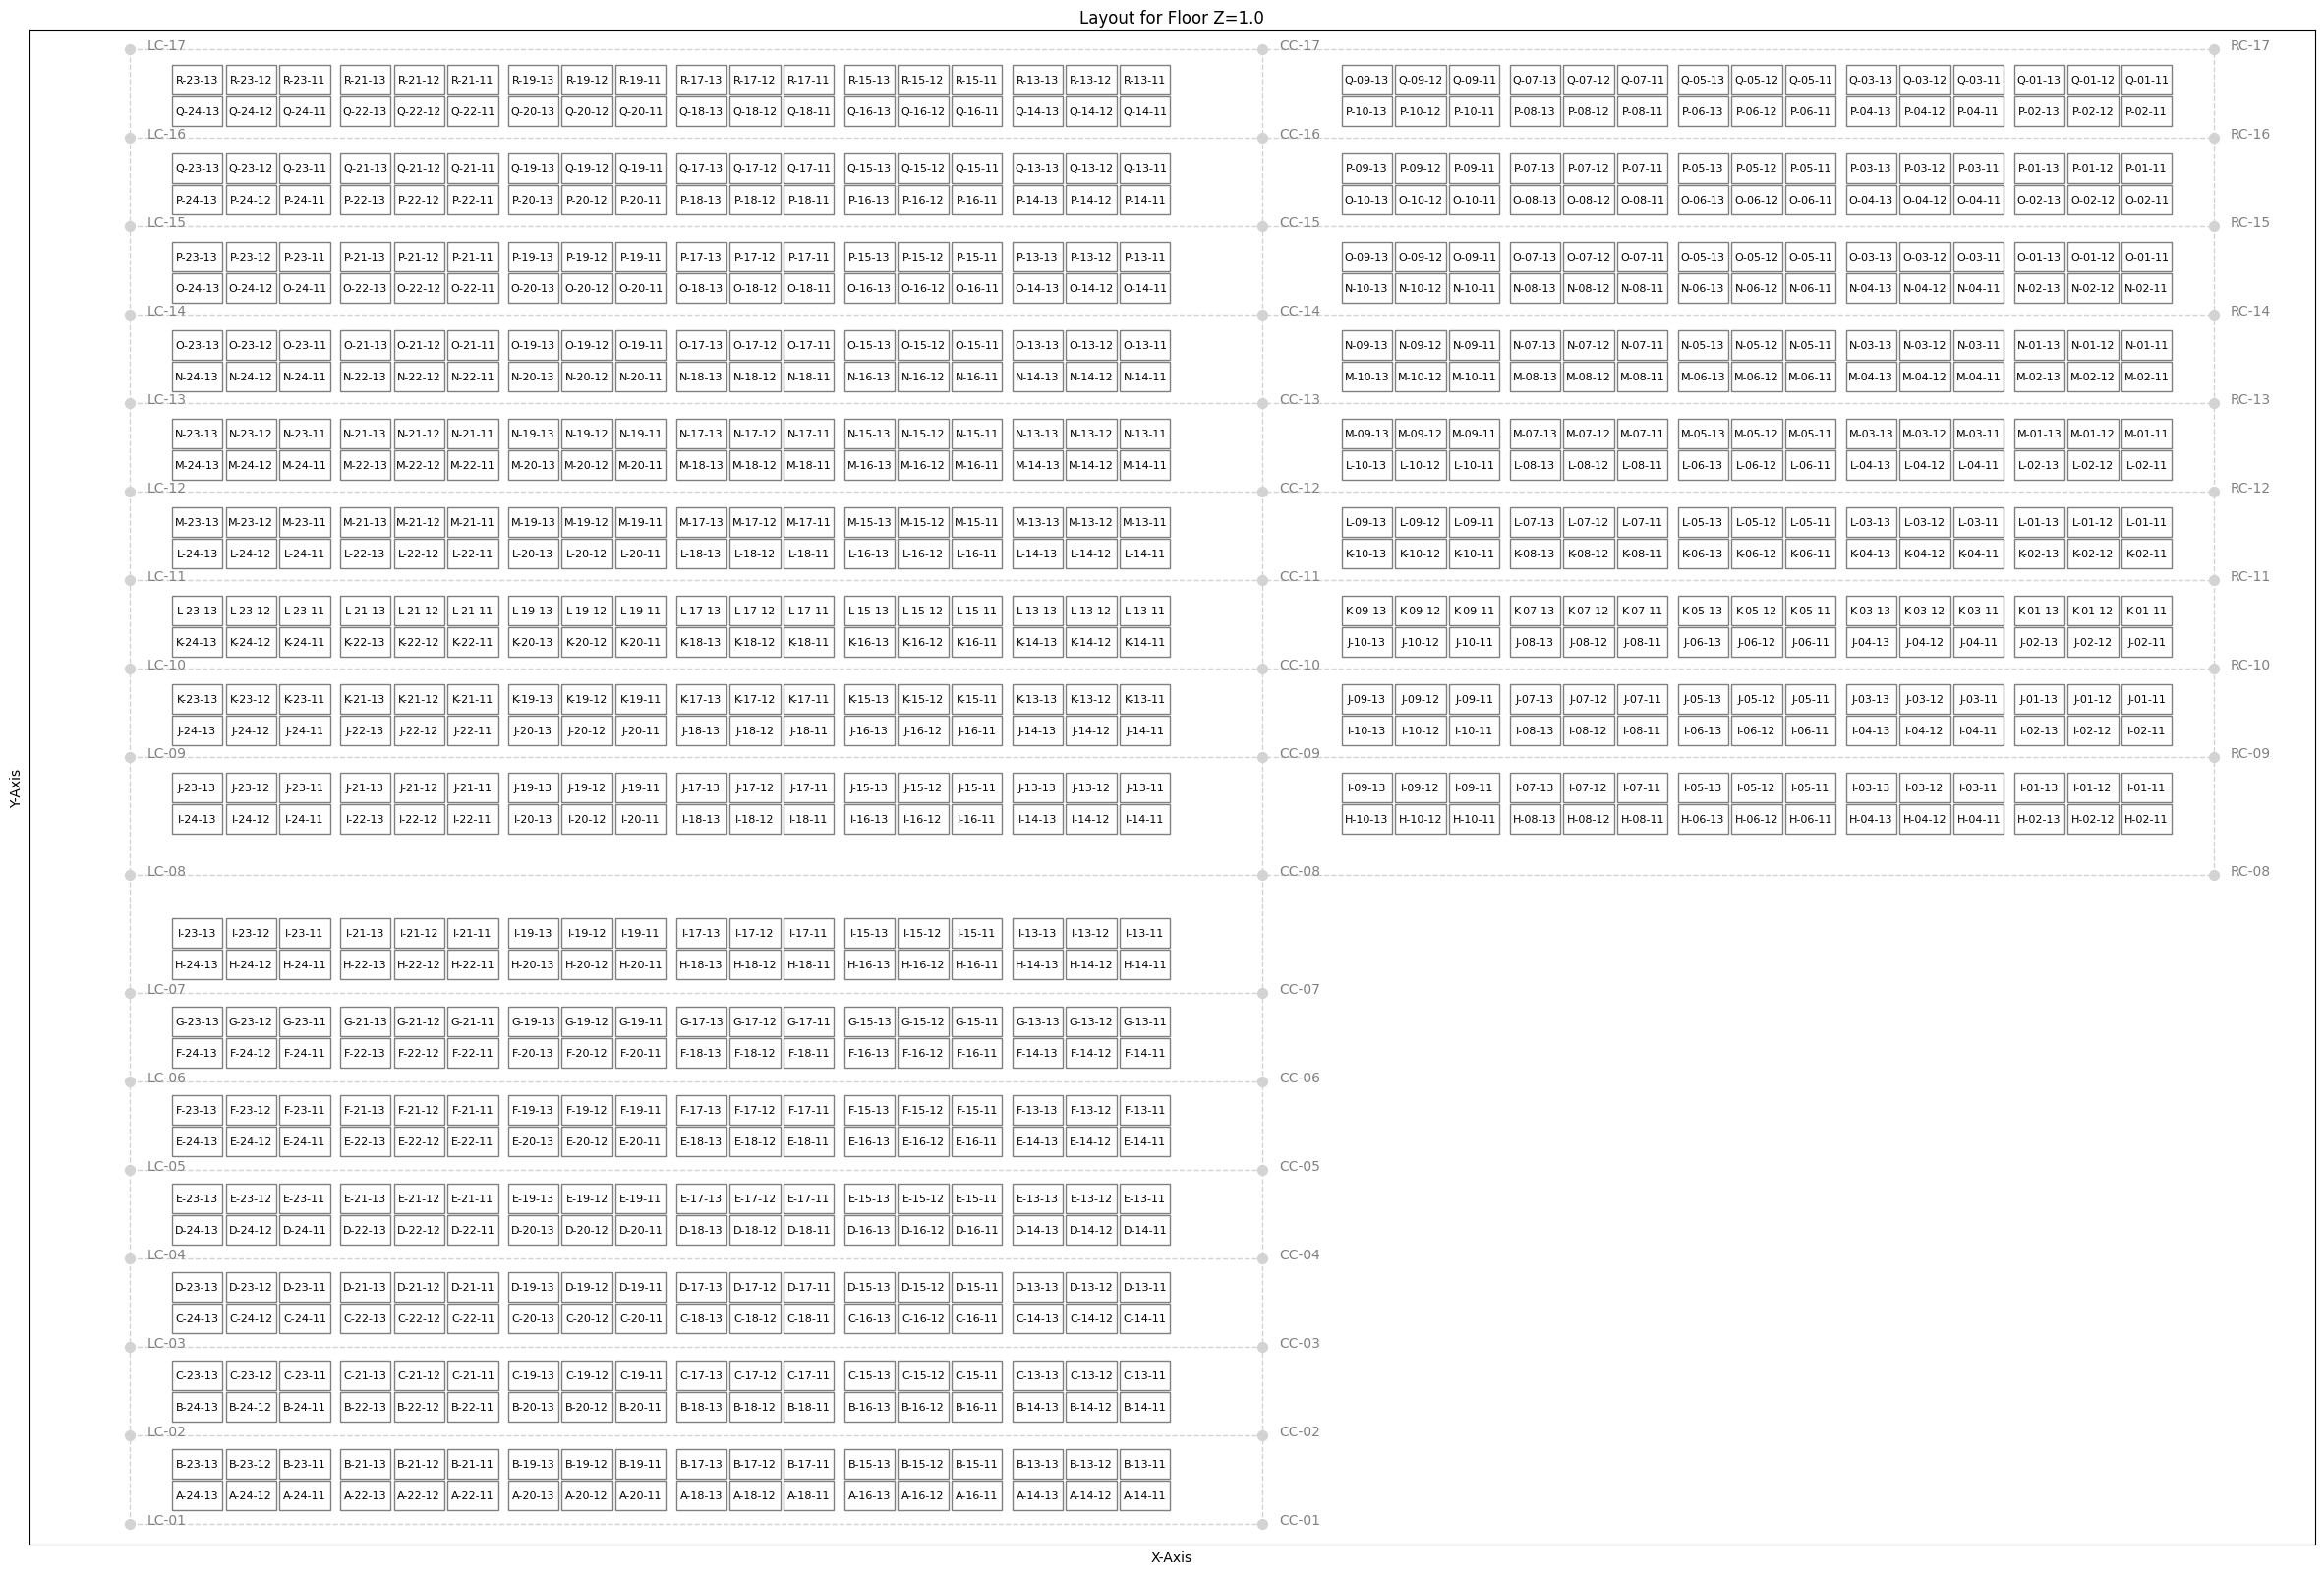

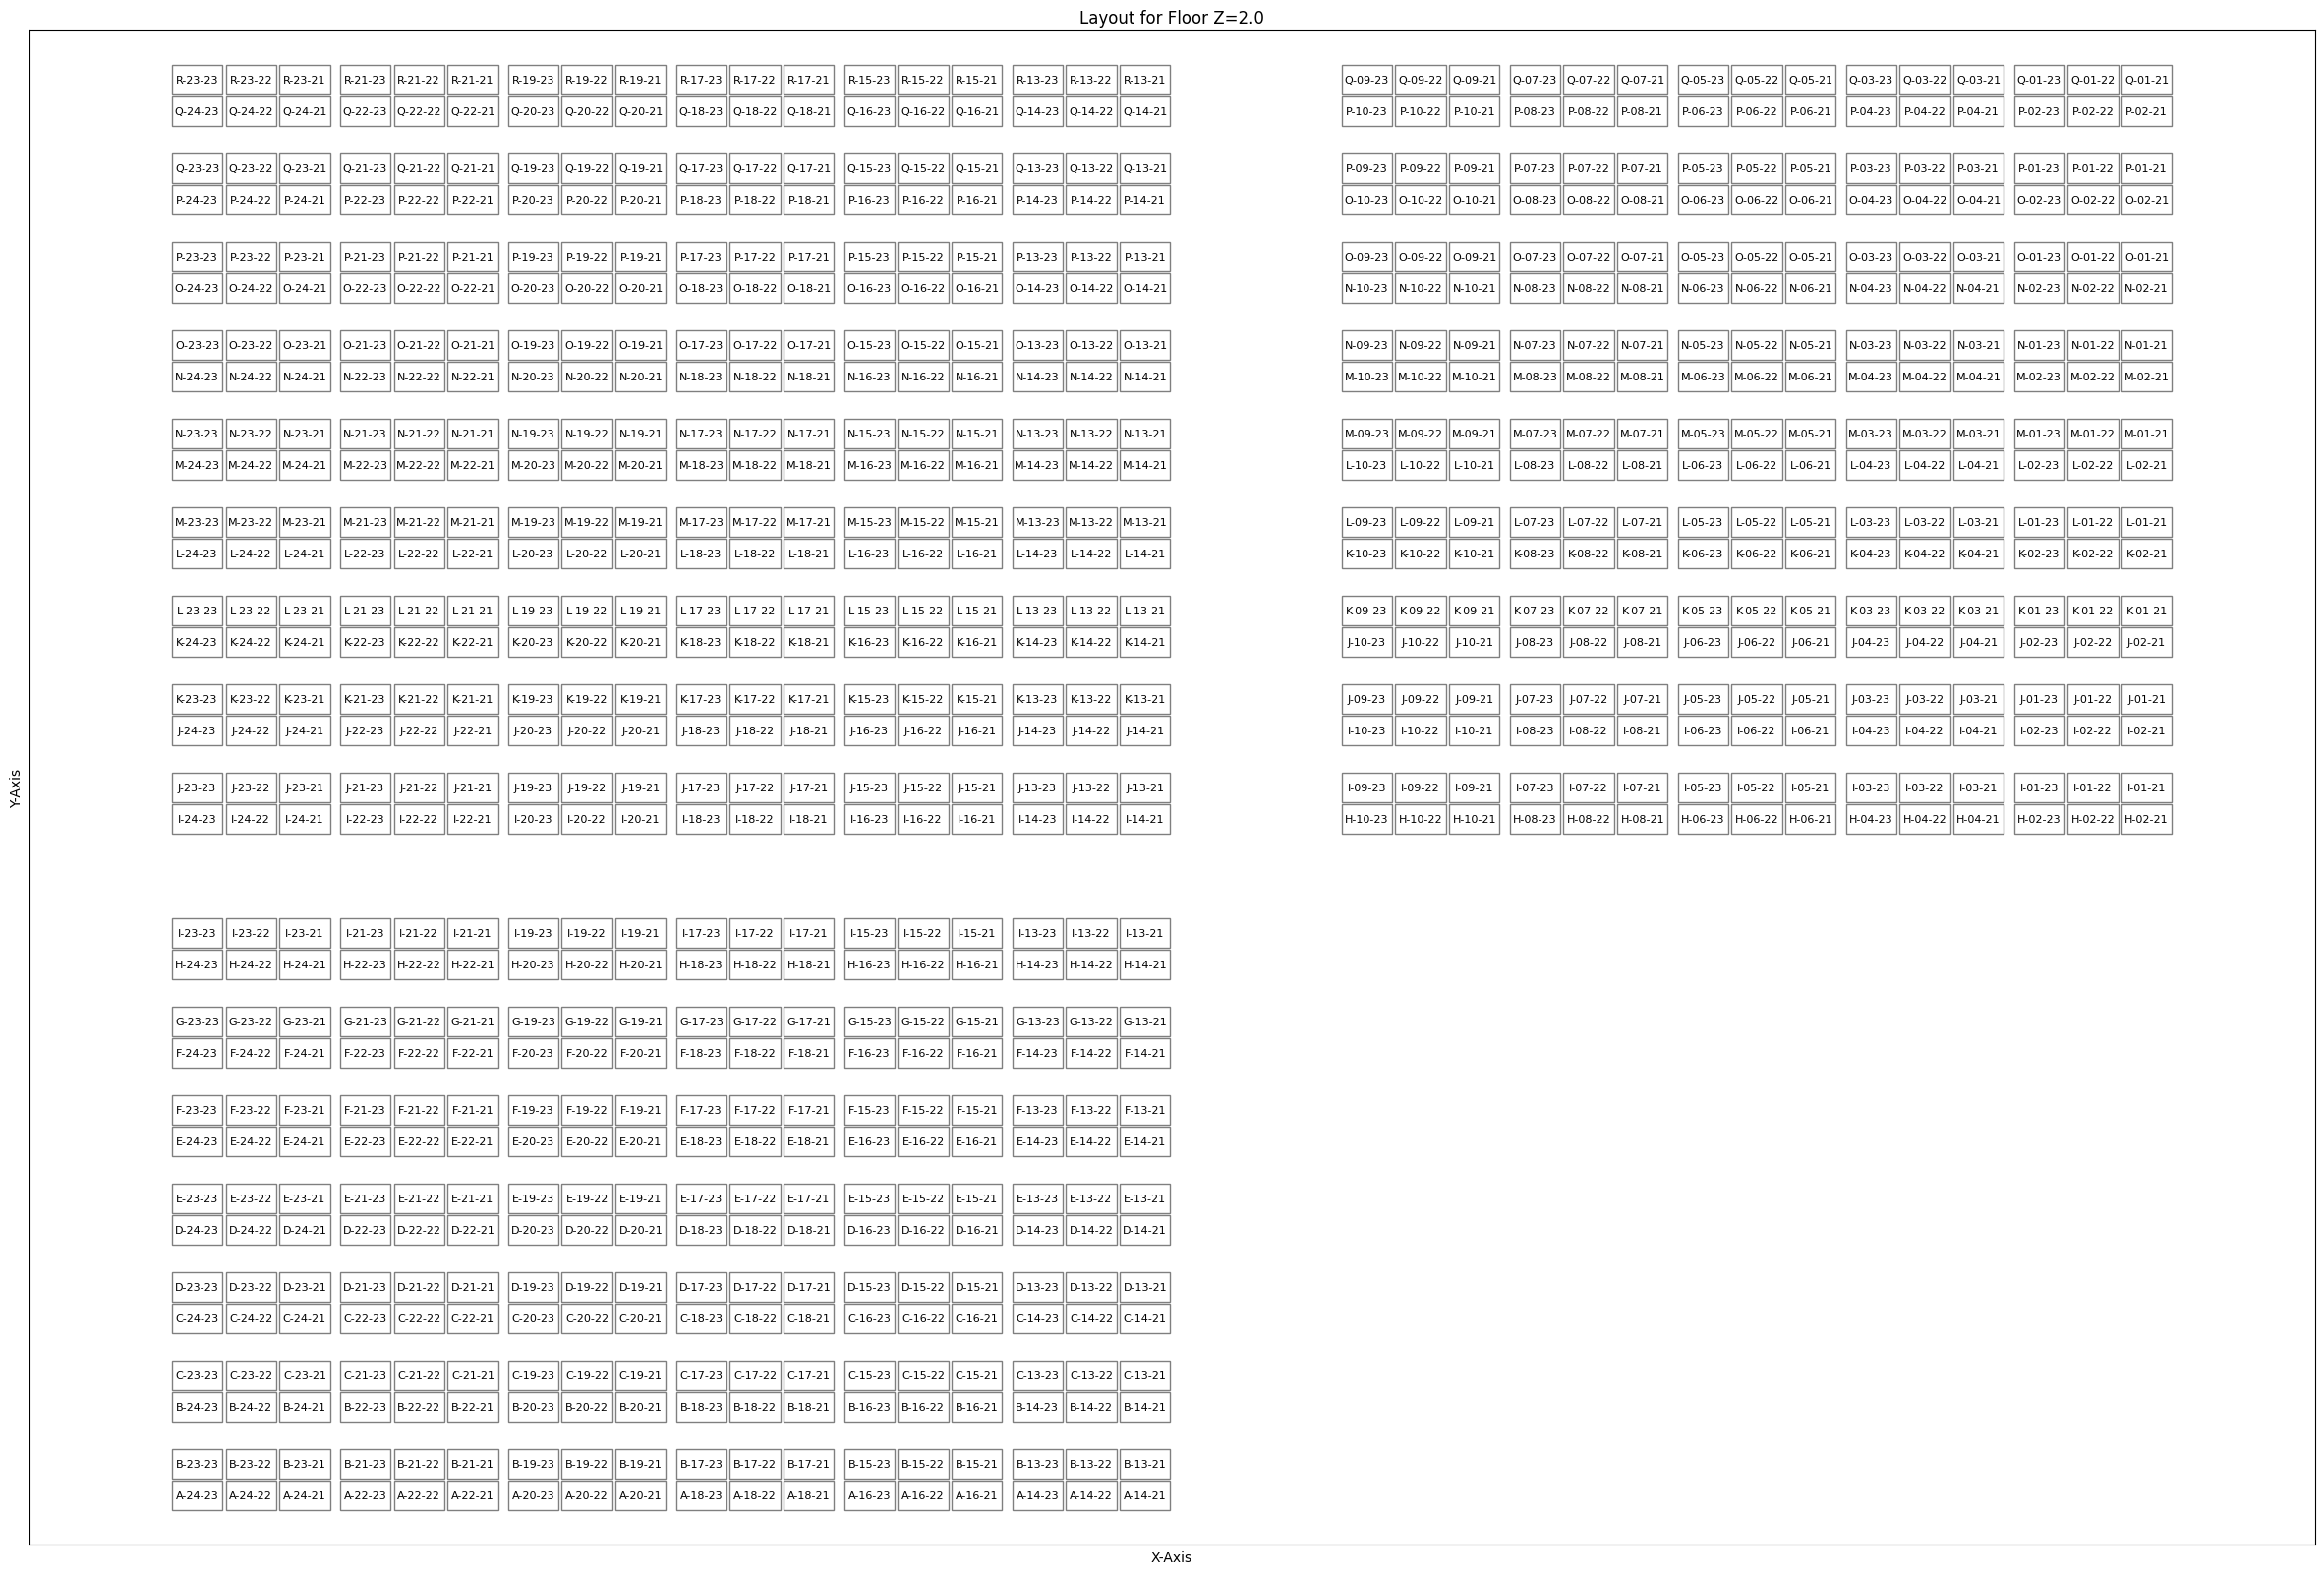

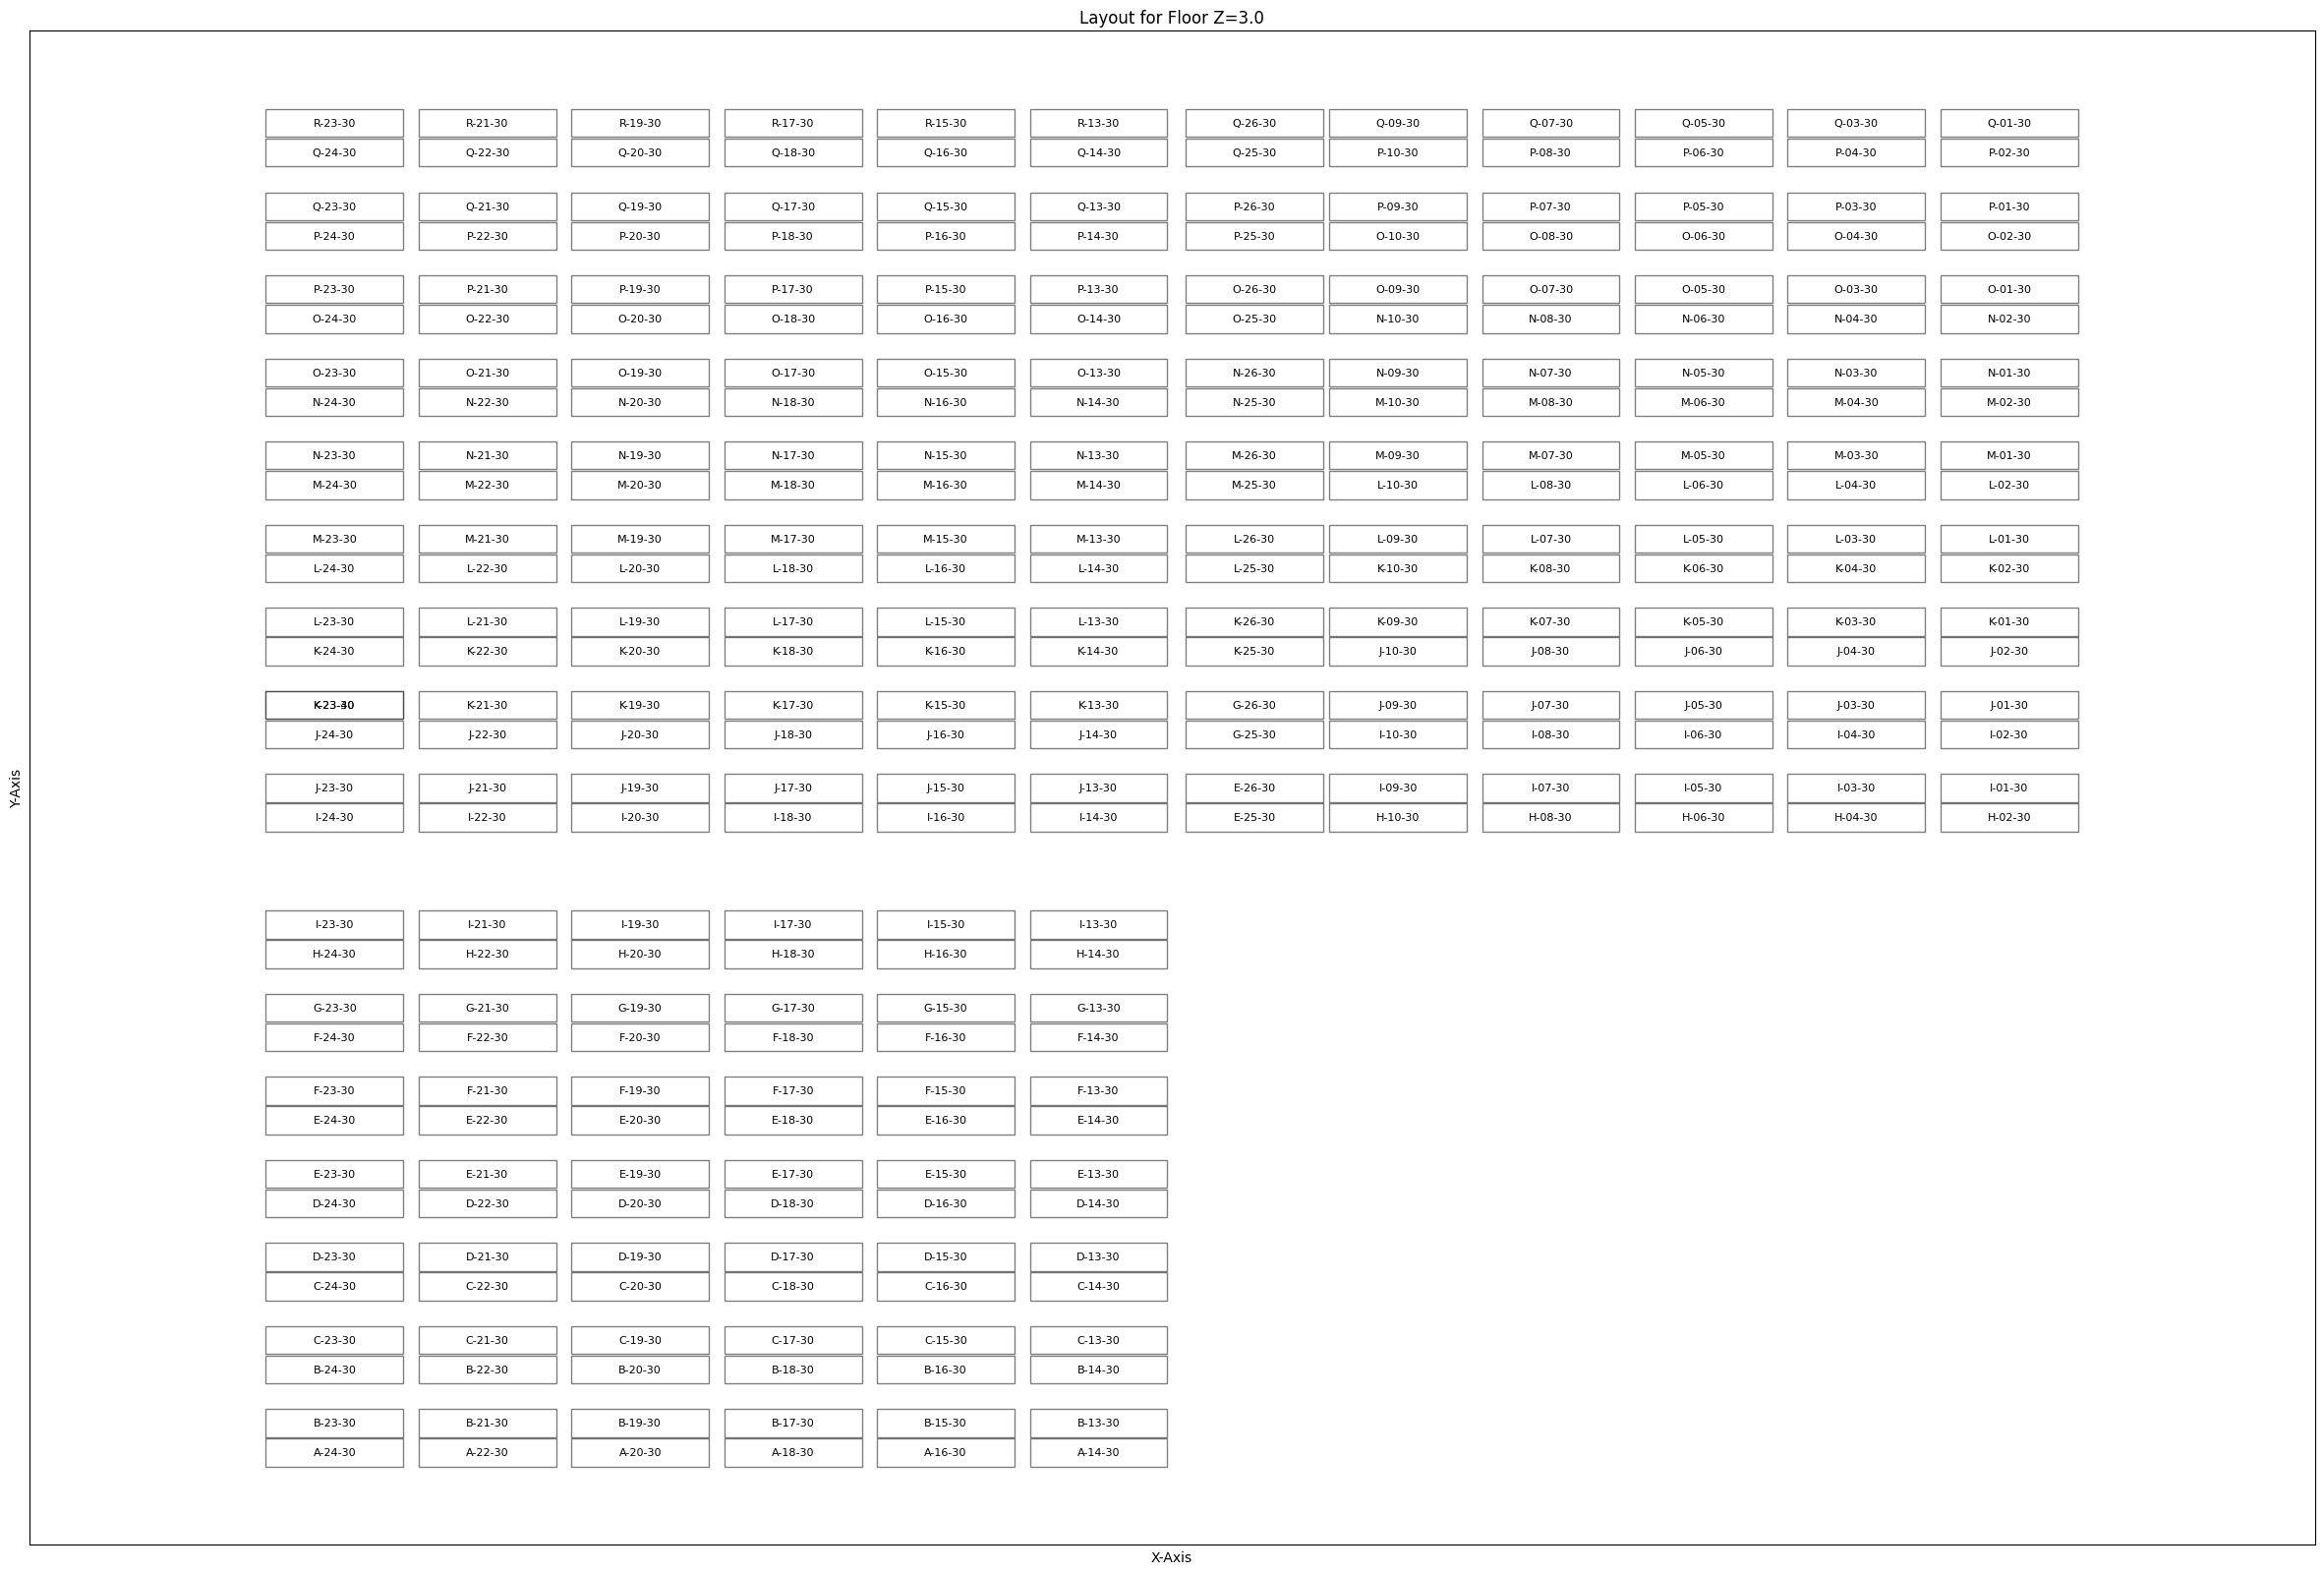

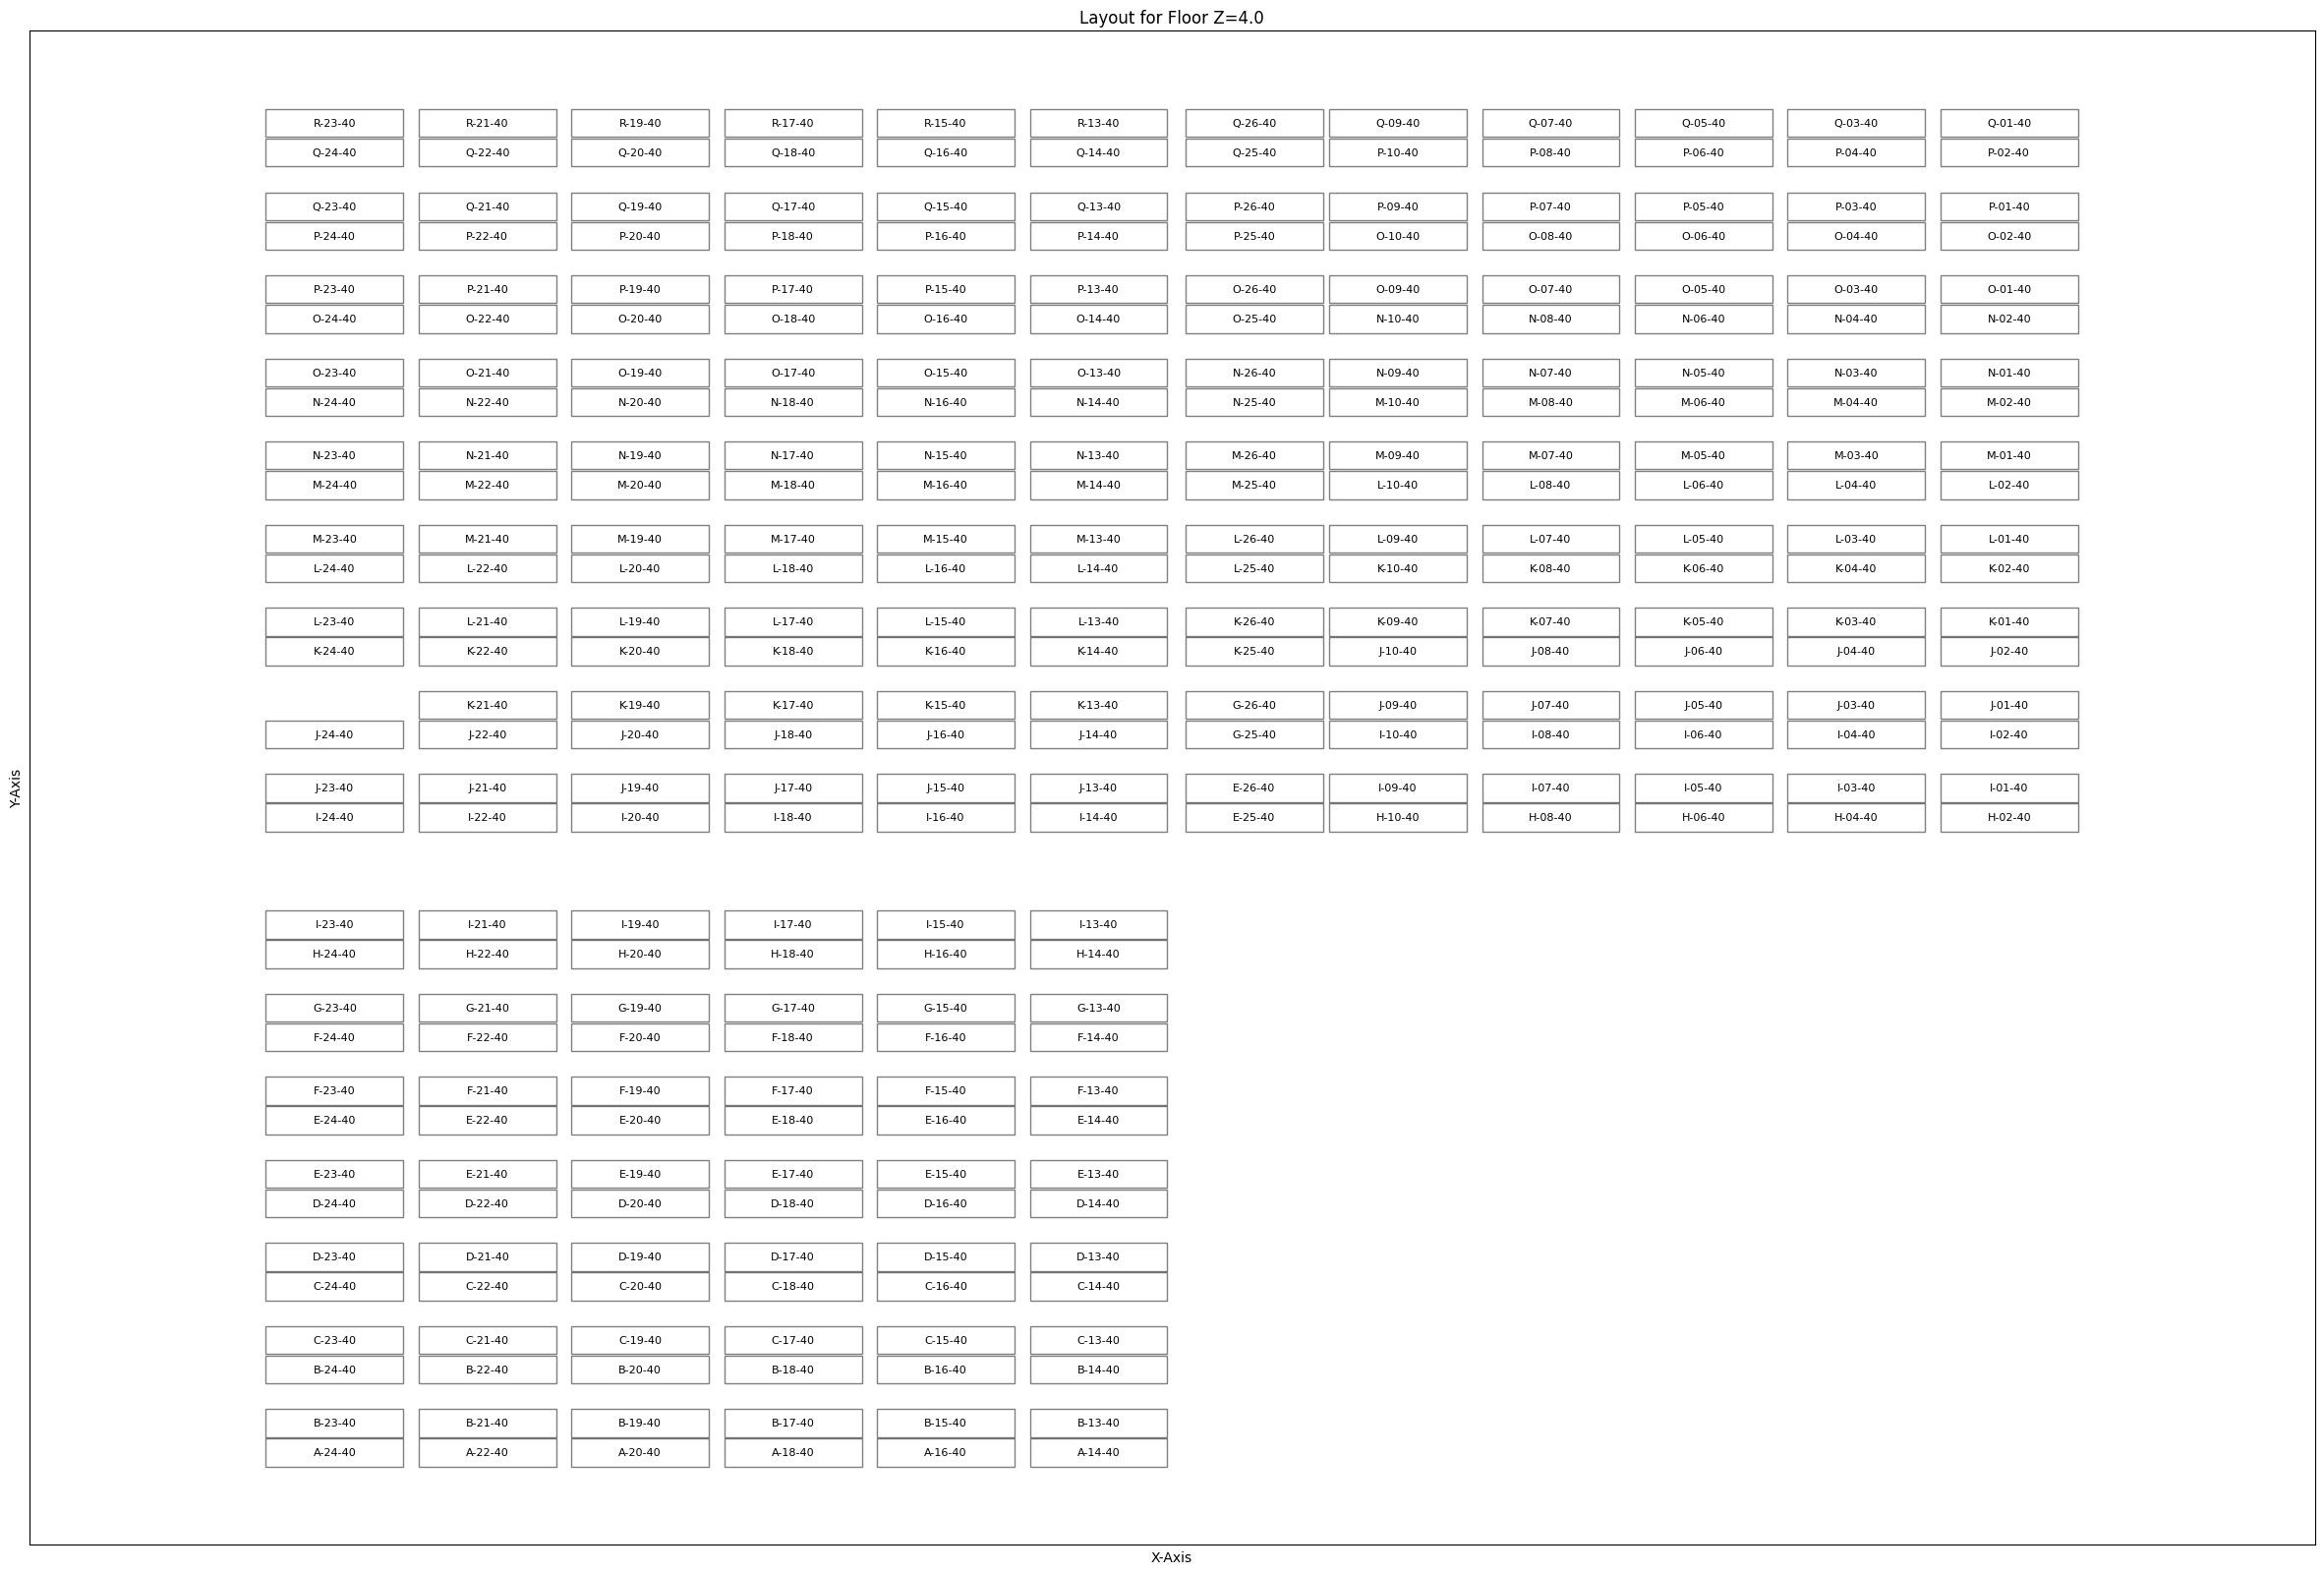

In [1]:
"""
This code was developed to visualize warehouse layouts on different floors (Z values)
based on data provided in Excel files. It generates diagrams that display the location of blocks
(rectangles representing storage positions) and support points in the X-Y plane for each Z value (floor).

Main functionalities:
1. Data loading and processing:
   - Position data is loaded from an Excel file and processed to extract X, Y, and Z coordinates.
   - Support points are also extracted and split into individual coordinates.

2. Layout plotting:
   - For each floor (Z value), blocks representing storage positions are drawn. The size of the blocks
     can be dynamically adjusted for different floors.
   - Support points are plotted on the same diagram, with horizontal and vertical connections
     indicated by dashed lines.

3. Visual configuration:
   - The dimensions of the plot and the axis limits are automatically adjusted based on the data.
   - Generated plots are saved as SVG files for easy reuse or future editing.

This code is modular and easy to adapt for different layouts, block sizes, or specific visualization
requirements. It can be used in projects for layout analysis or warehouse simulation.
"""


import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel files
# Here, users can change the file paths to their own data files.
df_positions = pd.read_excel('/content/Positions.xlsx', sheet_name='Positions')
df_support_points = pd.read_excel('/content/SupportPointsWarehouse.xlsx')

# Process position data: Split 'Points' into X, Y, and Z coordinates
df_positions[['X', 'Y', 'Z']] = df_positions['Points'].str.split(',', expand=True).astype(float)

# Process support point data: Parse 'points_specified' as a tuple and expand into X, Y, and Z columns
df_support_points[['X', 'Y', 'Z']] = df_support_points['points_specified'].apply(eval).apply(pd.Series)

# Get unique Z values (representing floors in the warehouse)
z_values = df_positions['Z'].unique()

# Iterate through each floor (Z value) to create separate plots
for z in sorted(z_values):
    # Filter the data for the current floor
    df_positions_floor = df_positions[df_positions['Z'] == z]
    df_support_points_floor = df_support_points[df_support_points['Z'] == z]

    # Set the size of the plot
    fig_width, fig_height = 30, 20
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Plot rectangular blocks for each position on the floor
    for _, position in df_positions_floor.iterrows():
        x, y = position['X'], position['Y']

        # Adjust block width dynamically based on the floor level
        block_width = 45 if z in [3, 4] else 15
        xmin, xmax = x - block_width / 2, x + block_width / 2
        ymin, ymax = y - 15, y + 15

        # Draw the rectangle representing the block
        rect = plt.Rectangle((xmin, ymin), block_width, 30, edgecolor='black', facecolor='white', alpha=0.5, linewidth=1)
        ax.add_patch(rect)

        # Add the location label at the center of the block
        ax.text(x, y, position['Location'], ha='center', va='center', fontsize=8)

    # Plot support points (if available for this floor)
    if not df_support_points_floor.empty:
        # Scatter plot for support points
        support_x = df_support_points_floor['X']
        support_y = df_support_points_floor['Y']
        support_labels = df_support_points_floor['labels']

        ax.scatter(support_x, support_y, color='lightgray', s=50, label='Support Points', zorder=2)

        # Add labels to support points
        for i, label in enumerate(support_labels):
            ax.text(support_x.iloc[i] + 5, support_y.iloc[i], label, fontsize=10, color='gray')

        # Connect points with the same Y (horizontal connections)
        for y_val in df_support_points_floor['Y'].unique():
            points_on_y = df_support_points_floor[df_support_points_floor['Y'] == y_val].sort_values(by='X')
            if len(points_on_y) > 1:
                ax.plot(points_on_y['X'], points_on_y['Y'], color='lightgray', linestyle='--', linewidth=1, zorder=1)

        # Connect points with the same X (vertical connections)
        for x_val in df_support_points_floor['X'].unique():
            points_on_x = df_support_points_floor[df_support_points_floor['X'] == x_val].sort_values(by='Y')
            if len(points_on_x) > 1:
                ax.plot(points_on_x['X'], points_on_x['Y'], color='lightgray', linestyle='--', linewidth=1, zorder=1)

    # Customize axis labels and limits
    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')

    # Remove tick labels for better visualization
    ax.set_xticks([])
    ax.set_yticks([])

    # Dynamically adjust axis limits based on data and floor level
    x_values = df_positions_floor['X']
    y_values = df_positions_floor['Y']
    margin = 100 if z in [3, 4] else 50

    ax.set_xlim(x_values.min() - margin, x_values.max() + margin)
    ax.set_ylim(y_values.min() - margin, y_values.max() + margin)

    # Add a title and save the figure
    plt.title(f"Layout for Floor Z={z}")
    plt.savefig(f'Layout_Z{z}.svg', format='svg')

    # Show the plot
    plt.show()